Dataset: https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset

*   **Nama: M. IKHSAN**
*   **NIM: 22.11.5260**
*   **Kelas: BDDM 4**





# **Klasifikasi Penyakit Alzheimer**

# Import Library

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#Load Dataset

In [41]:
# Baca file CSV
df = pd.read_csv('alzheimers_disease_data.csv')

In [42]:
# Melihat 5 baris pertama
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


Menampilkan 5 baris pertama dari dataset Alzheimer, termasuk semua kolomnya.

# Preprocessing Data

Di sini saya memeriksa tipe data karena terkadang ada beberapa fitur akan disimpan sebagai string, jika dalam kasus ini ada tipe data string kita harus mengubah string tersebut menjadi data integer terelebih dahulu, baru nanti dapat memplot datanya melalui grafik. Di sini, dalam kasus ini, data sudah dalam format integer dan duobel atau udah dalam format numerik.

In [43]:
# Informasi tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

menampilkan struktur data dari dataset, termasuk nama kolom dan tipe datanya.

In [44]:
#untuk melihat ukuran data
df.shape

(2149, 35)

Kode diatas menampilkan ukuran dataset atau berapa banyak jumlah data dan fitur yang ada dalam dataset ini

In [45]:
# Drop fitur yang engga penting
df = df.drop(['PatientID', 'DoctorInCharge'], axis=1)
df.head(10)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0
5,86,1,1,1,30.626886,0,4.140144,0.211062,1.584922,7.261953,...,5.510144,0,0,9.015686,1,0,0,0,0,0
6,68,0,3,2,38.387622,1,0.646047,9.257695,5.897388,5.477686,...,6.062124,0,0,9.236328,0,0,0,0,1,0
7,75,0,0,1,18.776009,0,13.723826,4.649451,8.341903,4.213210,...,3.401374,0,0,4.517248,1,0,0,0,1,1
8,72,1,1,0,27.833188,0,12.167848,1.531360,6.736882,5.748224,...,7.396061,0,1,0.756232,0,0,1,0,0,0
9,87,0,0,0,35.456302,1,16.028688,6.440773,8.086019,7.551773,...,1.148904,0,1,4.554394,0,0,0,0,0,0


Selanjutnya, kode ini melakukan preprocessing data dengan menghapus kolom yang tidak relevan ('PatientID', 'DoctorInCharge') dan mengganti nama kolom agar lebih mudah dibaca dan diproses.

In [46]:
# Mengganti nama kolom
df = df.rename(columns={
    'Age': 'age',
    'Gender': 'gender',
    'Ethnicity': 'ethnicity',
    'Smoking': 'smoking',
    'AlcoholConsumption': 'alcohol_consumption',
    'PhysicalActivity': 'physical_activity',
    'DietQuality': 'diet_quality',
    'SleepQuality': 'sleep_quality',
    'FamilyHistoryAlzheimers': 'family_history_AD',
    'CardiovascularDisease': 'cardiovascular_disease',
    'Diabetes': 'diabetes',
    'Depression': 'depression',
    'HeadInjury': 'head_injury',
    'Hypertension': 'hypertension',
    'SystolicBP': 'systolic_BP',
    'DiastolicBP': 'diastolic_BP',
    'CholesterolTotal': 'total_cholesterol',
    'CholesterolLDL': 'LDL_cholesterol',
    'CholesterolTriglycerides': 'Triglycerides',
    'FunctionalAssessment': 'functional_assessment',
    'MemoryComplaints': 'memory_complaints',
    'BehavioralProblems': 'behavioral_problems',
    'Confusion': 'confusion',
    'Disorientation': 'disorientation',
    'PersonalityChanges': 'personality_changes',
    'DifficultyCompletingTasks': 'task_completion_difficulty',
    'Forgetfulness': 'forgetfulness',
    'Diagnosis': 'diagnosis',
    'CholesterolHDL': 'HDl_cholesterol',
    'EducationLevel': 'education_level'
})

df.head() # Menampilkan 5 baris pertama DataFrame setelah perubahan nama kolom

,age,gender,ethnicity,education_level,BMI,smoking,alcohol_consumption,physical_activity,diet_quality,sleep_quality,...,functional_assessment,memory_complaints,behavioral_problems,ADL,confusion,disorientation,personality_changes,task_completion_difficulty,forgetfulness,diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [47]:
# Mengecek nilai yang hilang
df.isnull().sum()

,0
age,0
gender,0
ethnicity,0
education_level,0
BMI,0
smoking,0
alcohol_consumption,0
physical_activity,0
diet_quality,0
sleep_quality,0


Kode diatas mengecek missing value pada dataset

In [48]:
print(f"Jumlah data: {df.shape[0]}")
print(f"Jumlah data kosong : {df.isna().sum().to_dict()}")
print(f"Jumlah data duplicated : {df.duplicated().sum()}")

Jumlah data: 2149
Jumlah data kosong : {'age': 0, 'gender': 0, 'ethnicity': 0, 'education_level': 0, 'BMI': 0, 'smoking': 0, 'alcohol_consumption': 0, 'physical_activity': 0, 'diet_quality': 0, 'sleep_quality': 0, 'family_history_AD': 0, 'cardiovascular_disease': 0, 'diabetes': 0, 'depression': 0, 'head_injury': 0, 'hypertension': 0, 'systolic_BP': 0, 'diastolic_BP': 0, 'total_cholesterol': 0, 'LDL_cholesterol': 0, 'HDl_cholesterol': 0, 'Triglycerides': 0, 'MMSE': 0, 'functional_assessment': 0, 'memory_complaints': 0, 'behavioral_problems': 0, 'ADL': 0, 'confusion': 0, 'disorientation': 0, 'personality_changes': 0, 'task_completion_difficulty': 0, 'forgetfulness': 0, 'diagnosis': 0}
Jumlah data duplicated : 0


In [49]:
df['diagnosis'].value_counts()

,count
diagnosis,
0,1389
1,760


Hasil diatas mengindikasikan bahwa dalam dataset yang saya gunakan, terdapat 760 pasien yang dikategorikan sebagai positif Alzheimer, dan 1389 pasien yang dikategorikan sebagai negatif Alzheimer(atau kondisi normal).

In [50]:
# Statistik deskriptif dataset
df.describe()

,age,gender,ethnicity,education_level,BMI,smoking,alcohol_consumption,physical_activity,diet_quality,sleep_quality,...,functional_assessment,memory_complaints,behavioral_problems,ADL,confusion,disorientation,personality_changes,task_completion_difficulty,forgetfulness,diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Exploratory Data Analysis (EDA)

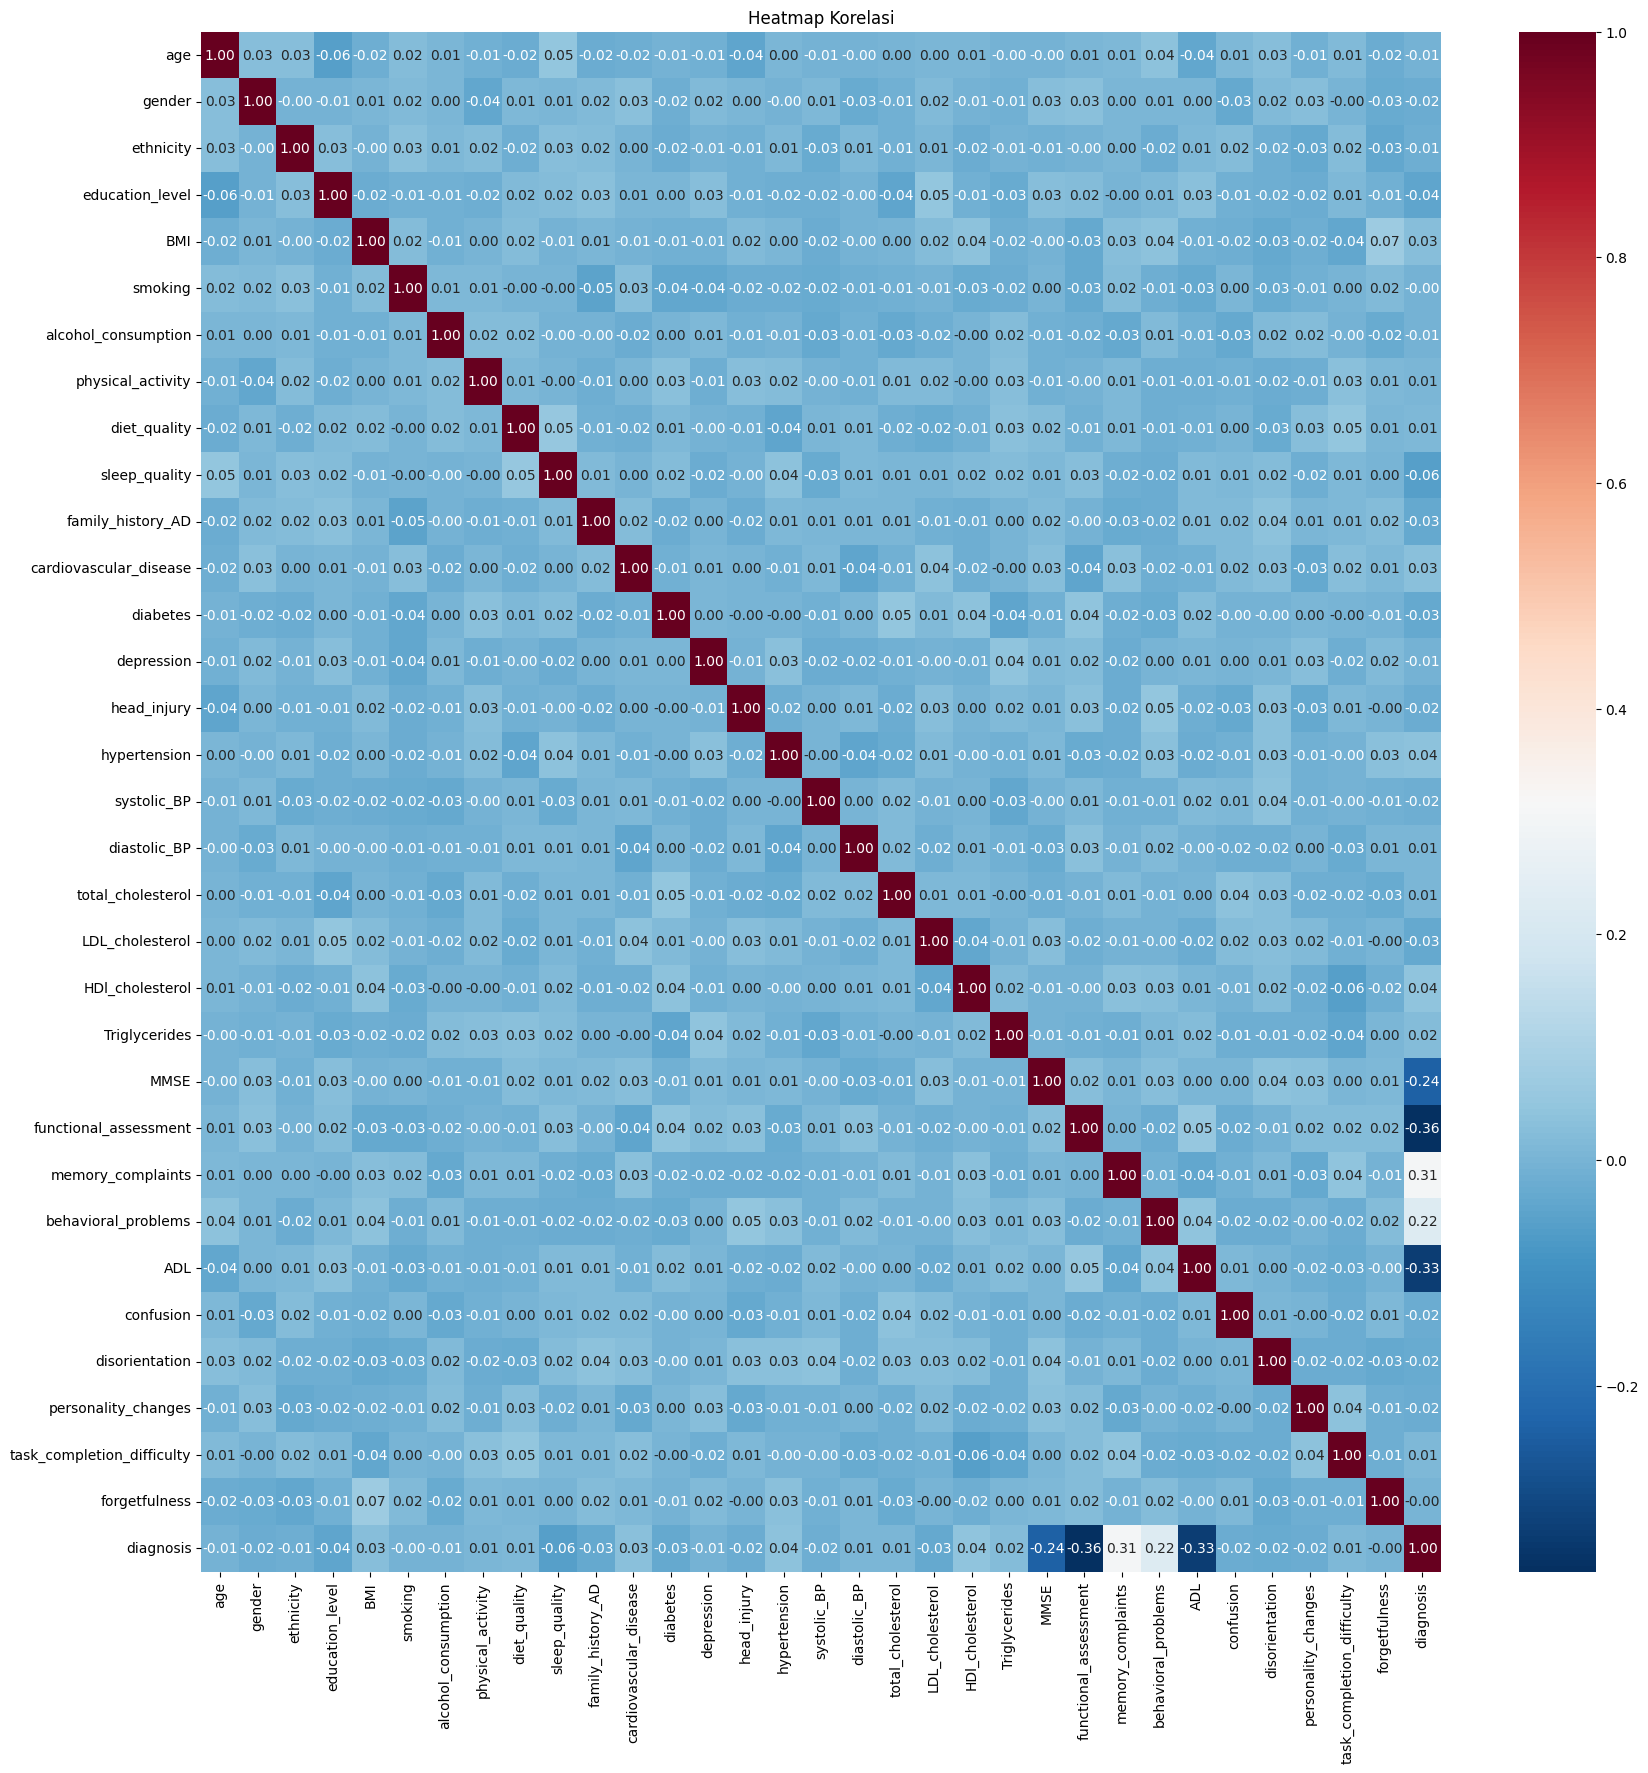

                                 age    gender  ethnicity  education_level  \
age                         1.000000  0.028708   0.027745        -0.060560   
gender                      0.028708  1.000000  -0.003660        -0.007070   
ethnicity                   0.027745 -0.003660   1.000000         0.026516   
education_level            -0.060560 -0.007070   0.026516         1.000000   
BMI                        -0.015677  0.005928  -0.003176        -0.023514   
smoking                     0.020060  0.016650   0.031485        -0.009904   
alcohol_consumption         0.007323  0.004330   0.008363        -0.012646   
physical_activity          -0.010249 -0.035795   0.020498        -0.016703   
diet_quality               -0.023386  0.010942  -0.018184         0.017412   
sleep_quality               0.049139  0.007310   0.029304         0.020248   
family_history_AD          -0.018784  0.018421   0.022526         0.032748   
cardiovascular_disease     -0.015284  0.034577   0.002347       

In [52]:
# Menghitung matriks korelasi
corr_matrix = df.corr()

# Membuat heatmap
plt.figure(figsize=(20, 20))  # Mengatur ukuran figure
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()
print(corr_matrix)

Secara umum hasil visualisai heatmap ini, sebagian besar fitur memiliki korelasi yang lemah atau mendekati nol satu sama lain, menunjukkan hubungan linier yang lemah.  Sebagai contoh, fitur diagnosis menunjukkan korelasi yang paling signifikan dengan functional_assessment dengan nilai(-0,36), mengindikasikan bahwa penilaian fungsional individu cenderung lebih rendah untuk individu dengan diagnosis positif. Selain itu, memory_complaints memiliki korelasi positif sebesar 0,31 dengan diagnosis, menunjukkan bahwa keluhan terkait memori cenderung meningkat pada individu dengan diagnosis positif. Korelasi ini dapat memberikan wawasan tentang peran keluhan memori dalam diagnosis. Di sisi lain, sebagian besar fitur seperti smoking, alcohol_consumption, dan physical_activity menunjukkan korelasi rendah dengan fitur lain, mencerminkan hubungan yang lebih independen terhadap variabel lain dalam dataset. Misalnya, korelasi antara smoking dan diagnosis hanya sebesar (-0,004), menunjukkan bahwa merokok mungkin tidak memiliki hubungan linier yang signifikan dengan diagnosis. Selain itu, fitur-fitur seperti diet_quality dan sleep_quality memiliki korelasi yang relatif kecil dengan sebagian besar fitur lainnya, menunjukkan bahwa mereka mungkin lebih independen. diet_quality menunjukkan korelasi positif kecil dengan physical_activity dengan nilai(0,01) dan diagnosis (0,01). Tidak ditemukan masalah multikolinearitas yang signifikan dalam dataset ini, karena tidak ada pasangan fitur yang memiliki korelasi mendekati 1. Hal ini memastikan bahwa fitur-fitur dalam dataset cukup independen dan tidak redundan.

##Visualisasi Variabel Diagnosis

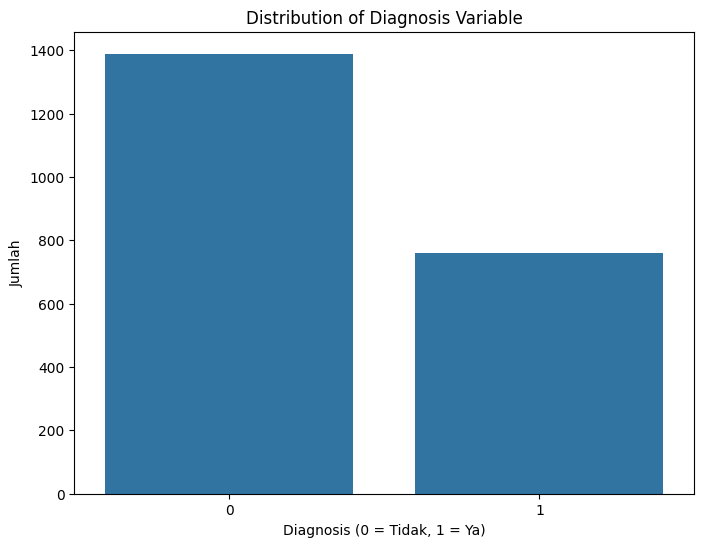

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis Variable')
plt.xlabel('Diagnosis (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah')
plt.show()

Menampilkan visualisasi diagram batang yang menunjukkan jumlah pasien dengan diagnosis positif Alzheimer dan negatif Alzheimer.

## Visualiasi Variabel Memory complaints

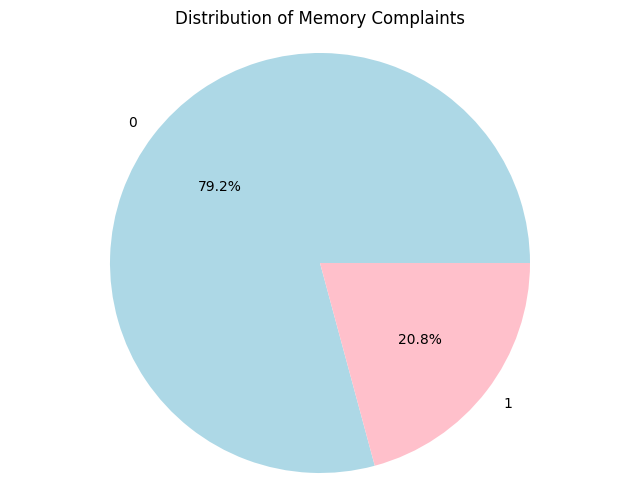

In [14]:
memory_counts = df['memory_complaints'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(memory_counts.values, labels=memory_counts.index, autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Distribution of Memory Complaints')
plt.axis('equal')
plt.show()

Pada Pie chart diatas menunjukkan distribusi keluhan memori (memory complaints) dalam dua kategori:
*   Kategori 0 (tanpa keluhan memori) mencakup 79.2% dari total data, menandakan bahwa mayoritas individu dalam dataset tidak melaporkan masalah terkait memori.
*   Kategori 1 (dengan keluhan memori) mencakup 20.8% dari total data, menunjukkan bahwa sebagian kecil individu mengalami keluhan terkait memori.

Distribusi ini menggambarkan bahwa meskipun sebagian besar individu tidak memiliki keluhan memori.

## Visualiasi Barchart Untuk Semua Fitur

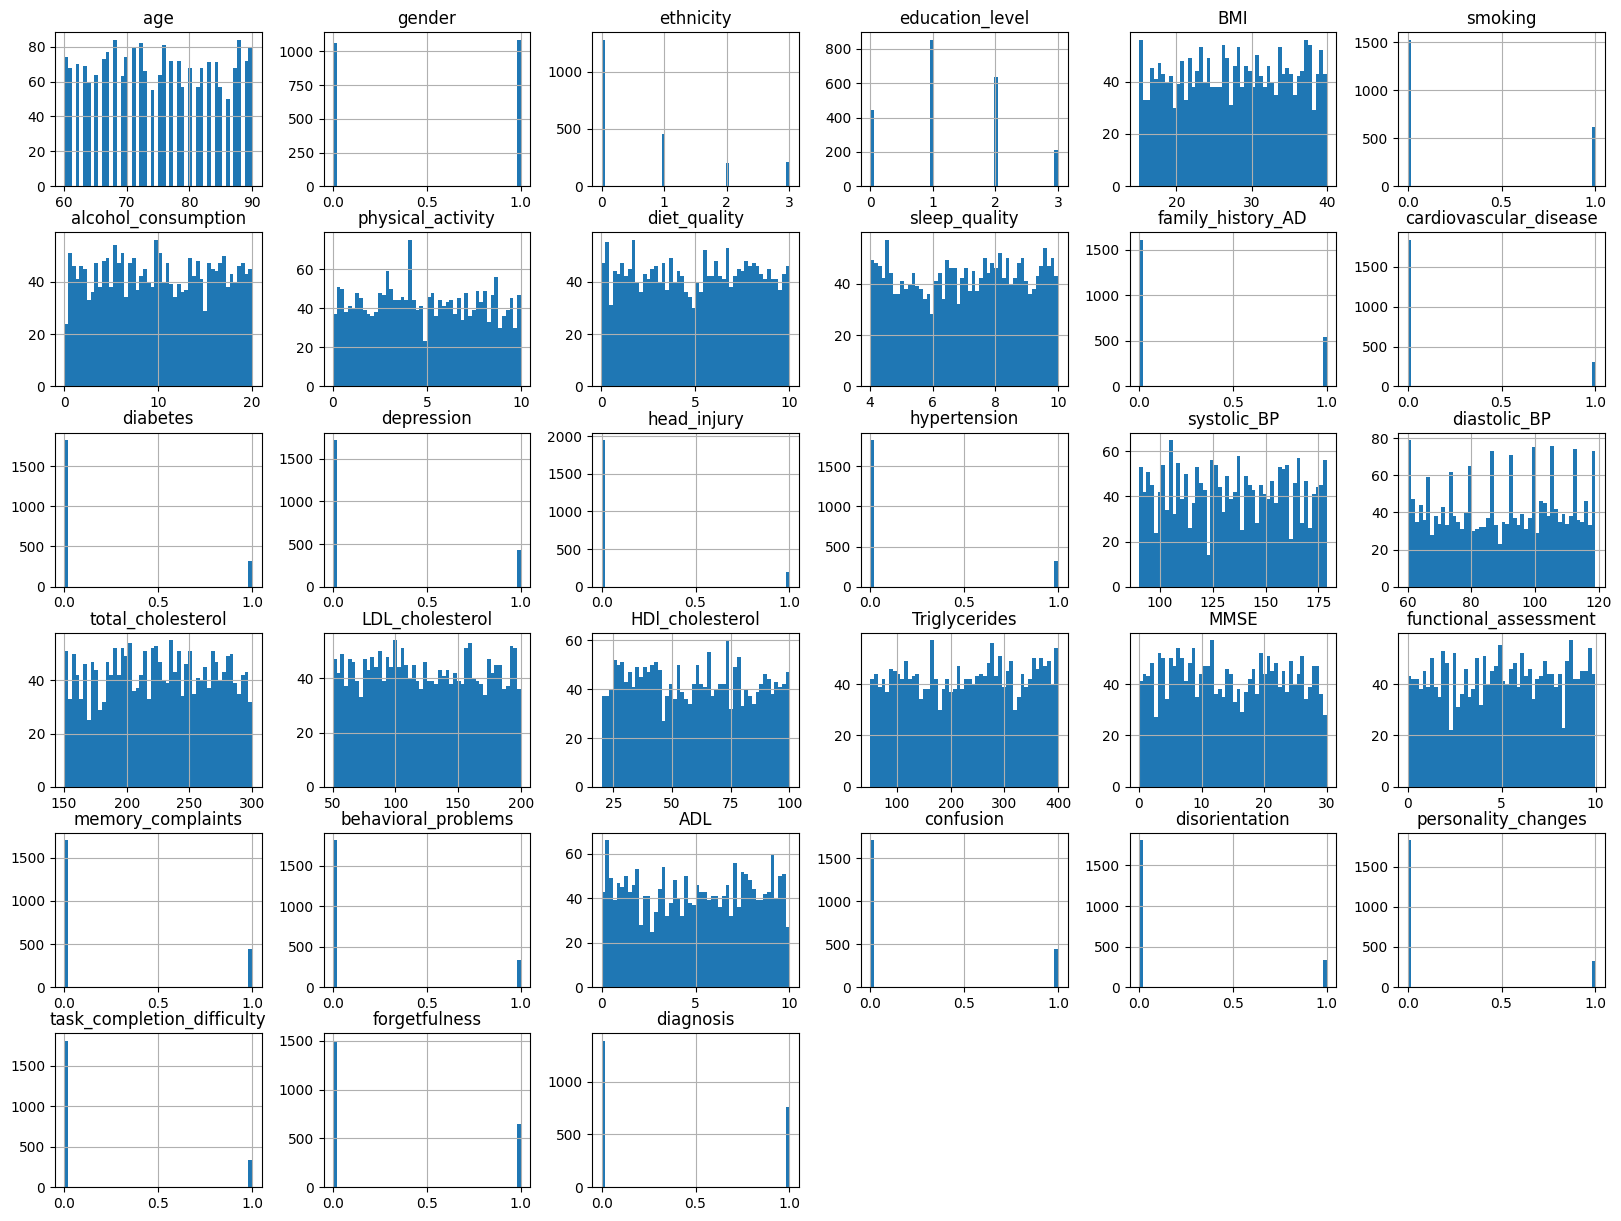

In [15]:
# analisis dan visualisasi data univariet
df.hist(bins=50, figsize=(20,15))
plt.show()

## Boxplot Visualisasi

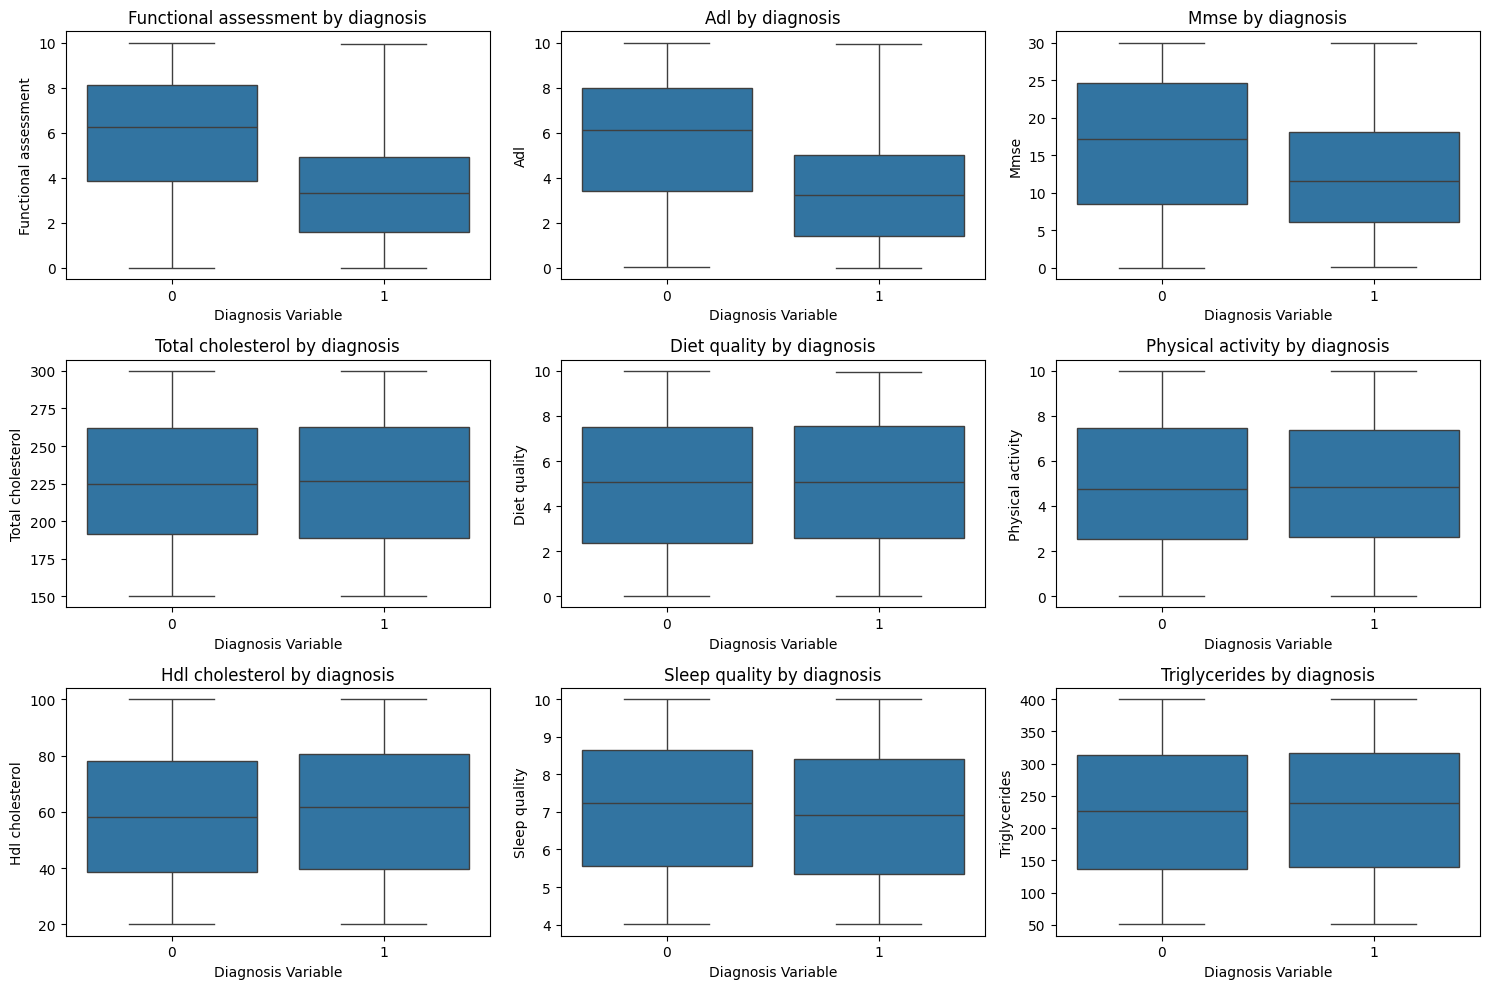

In [17]:
# Daftar variabel yang ingin ditampilkan
features = ['functional_assessment', 'ADL', 'MMSE', 'total_cholesterol', 'diet_quality', 'physical_activity', 'HDl_cholesterol', 'sleep_quality', 'Triglycerides']
diagnosis_var = "diagnosis"

# Membuat subplots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=diagnosis_var, y=feature, data=df)
    plt.xlabel("Diagnosis Variable")
    plt.ylabel(feature.replace("_", " ").capitalize())
    plt.title(f"{feature.replace('_', ' ').capitalize()} by {diagnosis_var}")

# Mengatur tata letak
plt.tight_layout()
plt.show()


## Histogram Visualisasi Fitur Age

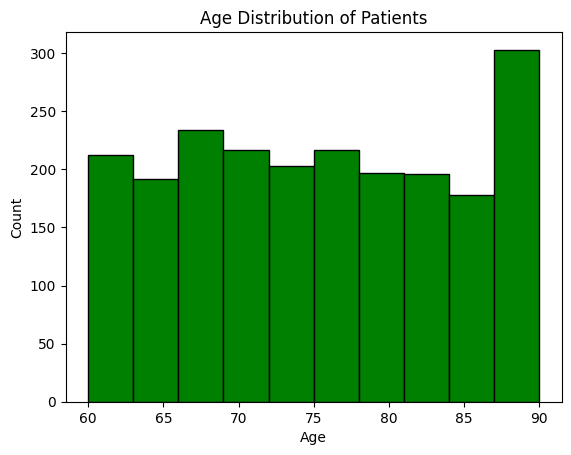

In [18]:
plt.hist(df["age"], bins=10, color='green', edgecolor='black')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Kode ini menghasilkan visualisasi berupa histogram yang menggambarkan sebaran usia pasien dalam dataset penyakit Alzheimer. Histogram ini memudahkan kita untuk melihat rentang usia pasien yang paling umum dan bagaimana usia terdistribusi dalam dataset. Informasi ini penting untuk memahami karakteristik demografis pasien Alzheimer dan dapat membantu dalam analisis lebih lanjut mengenai hubungan usia dengan penyakit Alzheimer

#Feature selection

Saya melakukan feature selection menggunakan Random Forest karena algoritma ini efektif dalam menangani dataset dengan berbagai ukuran, baik kecil maupun besar. Random Forest dapat menangani hubungan yang kompleks dan non-linear dengan baik, serta mampu mengidentifikasi fitur yang paling relevan untuk model, meskipun terdapat banyak fitur dalam dataset. Sehingga proses ini membantu mengurangi dimensi dataset, mengeliminasi fitur yang kurang relevan, dan meningkatkan efisiensi serta performa model yang akan dibangun."

In [19]:
# Memisahkan fitur dan target
X = df.drop(columns=['diagnosis'])  # Semua fitur
y = df['diagnosis']  # Target

# Membagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest untuk menghitung pentingnya fitur
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Menampilkan pentingnya fitur
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

# Memilih fitur dengan importance tinggi (misalnya threshold > 0.01)
important_features = feature_importance[feature_importance > 0.01].index.tolist()
print("\nFitur terpilih berdasarkan feature importance:", important_features)


Feature Importance:
 functional_assessment         0.187101
ADL                           0.164764
MMSE                          0.121234
memory_complaints             0.075928
behavioral_problems           0.043380
physical_activity             0.032228
HDl_cholesterol               0.030657
sleep_quality                 0.030560
Triglycerides                 0.029869
total_cholesterol             0.029589
diet_quality                  0.029418
BMI                           0.029128
alcohol_consumption           0.028697
LDL_cholesterol               0.028244
systolic_BP                   0.027566
diastolic_BP                  0.024985
age                           0.023360
education_level               0.010767
ethnicity                     0.007266
gender                        0.004575
depression                    0.004527
cardiovascular_disease        0.004056
forgetfulness                 0.003940
family_history_AD             0.003543
smoking                       0.003514
conf

In [20]:
#Drop fitur yang tidak terdapat pada feature selection
df = df.drop(['disorientation', 'head_injury', 'personality_changes', 'diabetes', 'task_completion_difficulty',
    'hypertension', 'confusion', 'smoking', 'family_history_AD', 'forgetfulness', 'cardiovascular_disease',
    'depression', 'gender', 'ethnicity'], axis=1)
df.head()

,age,education_level,BMI,alcohol_consumption,physical_activity,diet_quality,sleep_quality,systolic_BP,diastolic_BP,total_cholesterol,LDL_cholesterol,HDl_cholesterol,Triglycerides,MMSE,functional_assessment,memory_complaints,behavioral_problems,ADL,diagnosis
0,73,2,22.927749,13.297218,6.327112,1.347214,9.025679,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0
1,89,0,26.827681,4.542524,7.619885,0.518767,7.151293,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0
2,73,1,17.795882,19.555085,7.844988,1.826335,9.673574,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0
3,74,1,33.800817,12.209266,8.428001,7.435604,8.392554,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0
4,89,0,20.716974,18.454356,6.310461,0.795498,5.597238,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0


In [21]:
# Melihat ukuran data
df.shape

(2149, 19)

#Melakukan Over sampling

In [22]:
# Memisahkan fitur (X) dan target (y)
feature_columns = [col for col in df.columns if col != 'diagnosis']
X = df[feature_columns]
y = df['diagnosis']

# Menerapkan SMOTE untuk oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Menggabungkan kembali fitur dan target yang telah di-resample
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=feature_columns), pd.Series(y_resampled, name='diagnosis')], axis=1)

# Menampilkan distribusi data setelah SMOTE
df_resampled['diagnosis'].value_counts()

,count
diagnosis,
0,1389
1,1389


kode tersebut menunjukkan bahwa setelah menerapkan SMOTE (Synthetic Minority Over-sampling Technique), dataset Alzheimer kini memiliki jumlah data yang seimbang untuk kedua kelas diagnosis. Sebelumnya, terdapat ketidakseimbangan antara kelas dengan lebih banyak pasien non-Alzheimer (0) dibandingkan positif Alzheimer (1) . SMOTE mengatasi hal ini dengan menghasilkan data sintetis untuk kelas (1) minoritas (positif Alzheimer) sehingga jumlahnya setara dengan kelas mayoritas yaitu kelas (0).

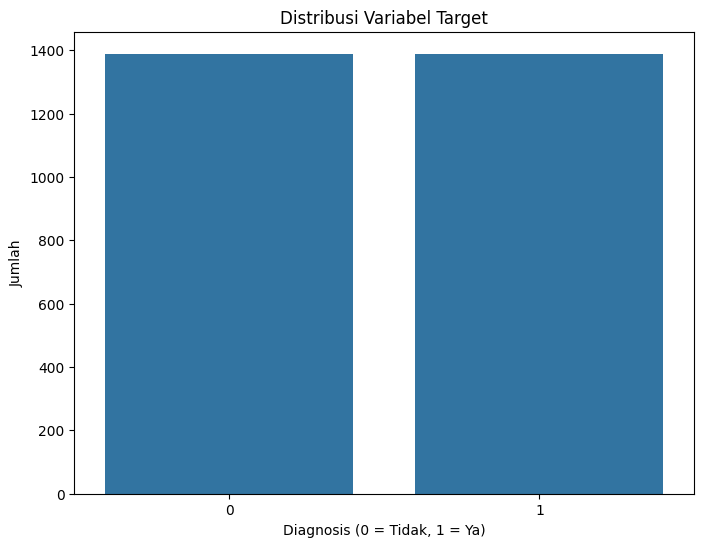

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df_resampled)
plt.title('Distribusi Variabel Target')
plt.xlabel('Diagnosis (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah')
plt.show()

In [24]:
df_resampled.head()

,age,education_level,BMI,alcohol_consumption,physical_activity,diet_quality,sleep_quality,systolic_BP,diastolic_BP,total_cholesterol,LDL_cholesterol,HDl_cholesterol,Triglycerides,MMSE,functional_assessment,memory_complaints,behavioral_problems,ADL,diagnosis
0,73,2,22.927749,13.297218,6.327112,1.347214,9.025679,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0
1,89,0,26.827681,4.542524,7.619885,0.518767,7.151293,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0
2,73,1,17.795882,19.555085,7.844988,1.826335,9.673574,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0
3,74,1,33.800817,12.209266,8.428001,7.435604,8.392554,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0
4,89,0,20.716974,18.454356,6.310461,0.795498,5.597238,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0


In [25]:
#untuk melihat ukuran data
df_resampled.shape

(2778, 19)

# Split Dataset

In [26]:
X = df_resampled.drop(columns=['diagnosis'])
y = df_resampled['diagnosis']

# Split data menjadi training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifikasi ukuran data setelah split
print("Jumlah Data Training :", X_train.shape[0])
print("Jumlah Data Testing :", X_test.shape[0])


Jumlah Data Training : 2222
Jumlah Data Testing : 556


#Model XGBOOST

In [27]:
# Melatih model dengan XGBoost
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

#Classification Report

In [28]:
# Evaluasi Model
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       273
           1       0.94      0.87      0.90       283

    accuracy                           0.90       556
   macro avg       0.91      0.91      0.90       556
weighted avg       0.91      0.90      0.90       556



In [29]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
cm

array([[258,  15],
       [ 38, 245]])

#Confusion Matrix

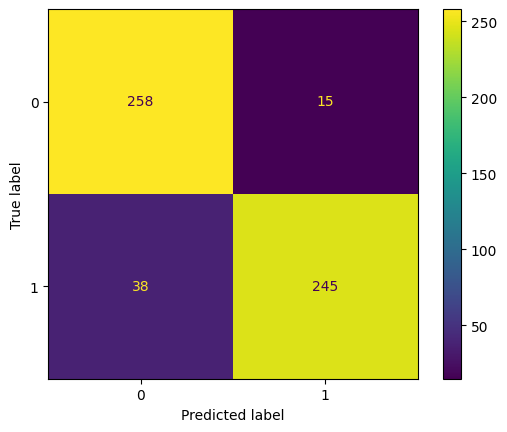

In [30]:
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#Hyperparameter Tuning Model XGBoost

In [31]:
# Tentukan parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9, 11],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
}

# Inisialisasi model XGBoost
best_accuracy = 0
best_params = {}

# Melakukan pencarian grid manual
for n_estimators in param_grid['n_estimators']:
    for learning_rate in param_grid['learning_rate']:
        for max_depth in param_grid['max_depth']:
            for subsample in param_grid['subsample']:
                for colsample_bytree in param_grid['colsample_bytree']:
                    # Inisialisasi model dengan parameter yang sedang diuji
                    model = XGBClassifier(n_estimators=n_estimators,
                                          learning_rate=learning_rate,
                                          max_depth=max_depth,
                                          subsample=subsample,
                                          colsample_bytree=colsample_bytree,
                                          random_state=42)

                    # Latih model
                    model.fit(X_train, y_train)

                    # Evaluasi model
                    y_pred = model.predict(X_test)
                    accuracy = model.score(X_test, y_test)

                    # Simpan hasil terbaik
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_params = {
                            'n_estimators': n_estimators,
                            'learning_rate': learning_rate,
                            'max_depth': max_depth,
                            'subsample': subsample,
                            'colsample_bytree': colsample_bytree
                        }

# Menampilkan parameter terbaik dan hasil akurasi terbaik
print("Best Parameters:", best_params)
print("Best Accuracy on Test Data:", best_accuracy)

# Evaluasi model dengan parameter terbaik
model_best = XGBClassifier(**best_params, random_state=42)
model_best.fit(X_train, y_train)
y_pred_best = model_best.predict(X_test)
print(classification_report(y_test, y_pred_best))

Best Parameters: {'n_estimators': 100, 'learning_rate': 0.2, 'max_depth': 11, 'subsample': 0.9, 'colsample_bytree': 0.6}
Best Accuracy on Test Data: 0.9154676258992805
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       273
           1       0.94      0.89      0.92       283

    accuracy                           0.92       556
   macro avg       0.92      0.92      0.92       556
weighted avg       0.92      0.92      0.92       556



In [32]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
cm

array([[256,  17],
       [ 30, 253]])

#Confusion Matrix Hasil Hyperparameter Tuning

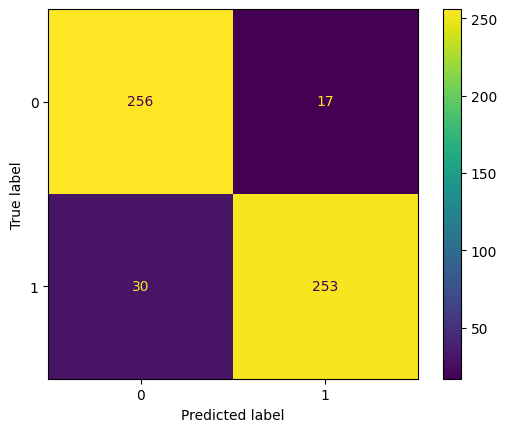

In [33]:
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

##Menyimpan Model XGBoost

In [36]:
import joblib
# Menyimpan model XGBoost tanpa tuning
joblib.dump(model_xgb, 'model_xgb.joblib')
print("Model XGBoost yang belum dituning disimpan sebagai 'model_xgb.joblib'")

Model XGBoost yang belum dituning disimpan sebagai 'model_xgb.joblib'


##Menyimpan Model XGBoost Setalah Melakukan Hyperparameter Tuning

In [38]:
# Menyimpan model hyperparameter tuning
joblib.dump(model_best, 'model_xgb_hyperparameter_tuning.joblib')
print("Model Setelah Tuning disimpan sebagai 'model_xgb_hyperparameter_tuning.joblib'")


Model Setelah Tuning disimpan sebagai 'model_xgb_hyperparameter_tuning.joblib'
